In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
df=pd.read_excel("Series_1.xlsx")
df.head()

,Time,Value
0,1,0.000000
1,2,-0.090263
2,3,0.749995
3,4,1.247887
4,5,0.131282


In [3]:
df.tail()

,Time,Value
9995,9996,1.302256
9996,9997,0.558165
9997,9998,-1.401546
9998,9999,-1.817701
9999,10000,-0.858623


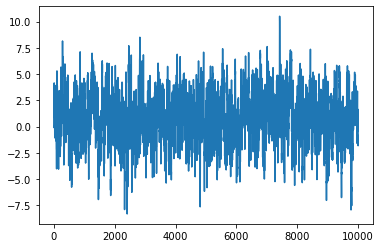

In [4]:
plt.plot(df["Value"])

In [5]:
X=df["Value"].values

In [6]:
result = adfuller(X)

In [7]:
print(f"ADF Statistics is {result[0]:.4f}")

ADF Statistics is -22.1849


In [8]:
print(f"p values is {result[1]}")

p values is 0.0


In [9]:
print("Critical Values are:")
for key,value in result[4].items():
    print(f"{key}:  {value:.4f}")

Critical Values are:
1%:  -3.4310
5%:  -2.8618
10%:  -2.5669


In [10]:
result[4]

{'1%': -3.4310041633725734,
 '5%': -2.861829101294412,
 '10%': -2.566923883481157}

In [11]:
if result[0] < result[4]["5%"]:
    print("Reject the null hypothesis, time series is stationary")
else:
    print("Failed to reject the null hypothesis, time series is non-stationary")

Reject the null hypothesis, time series is stationary


In [12]:
X=df["Value"].values
result = adfuller(X)
print(f"ADF Statistics is {result[0]:.4f}")
print(f"p values is {result[1]}")
print("Critical Values are:")
for key,value in result[4].items():
    print(f"{key}:  {value:.4f}")
if result[0] < result[4]["5%"]:
    print("Reject the null hypothesis, time series is stationary")
else:
    print("Failed to reject the null hypothesis, time series is non-stationary")

ADF Statistics is -22.1849
p values is 0.0
Critical Values are:
1%:  -3.4310
5%:  -2.8618
10%:  -2.5669
Reject the null hypothesis, time series is stationary


In [13]:
df["Difference"] = df["Value"].diff()

In [14]:
df.head()

,Time,Value,Difference
0,1,0.000000,NaN
1,2,-0.090263,-0.090263
2,3,0.749995,0.840259
3,4,1.247887,0.497891
4,5,0.131282,-1.116605


In [15]:
diff_values=df["Difference"].values
diff_values

array([        nan, -0.09026324,  0.84025861, ..., -1.95971144,
       -0.41615453,  0.95907765])

In [16]:
y=diff_values[~np.isnan(df["Difference"])]
y

array([-0.09026324,  0.84025861,  0.49789131, ..., -1.95971144,
       -0.41615453,  0.95907765])

In [17]:
y.shape

(9999,)

In [18]:
original_values=df["Value"].values
original_values

array([ 0.        , -0.09026324,  0.74999537, ..., -1.40154641,
       -1.81770095, -0.8586233 ])

In [19]:
X=original_values[:-1]
X

array([ 0.        , -0.09026324,  0.74999537, ...,  0.55816503,
       -1.40154641, -1.81770095])

In [20]:
X.shape

(9999,)

In [21]:
X=sm.add_constant(X)

In [22]:
model=sm.OLS(y,X)
results=model.fit()

In [23]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     492.2
Date:                Mon, 30 May 2022   Prob (F-statistic):          1.74e-106
Time:                        20:28:41   Log-Likelihood:                -14130.
No. Observations:                9999   AIC:                         2.826e+04
Df Residuals:                    9997   BIC:                         2.828e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0659      0.010      6.347      0.0

In [24]:
results.tvalues[1]

-22.18493022734867

### another series

In [25]:
df2=pd.read_excel("Series_2.xlsx")
df2.head()

,Time,Value
0,1,50
1,2,120
2,3,-25
3,4,31
4,5,94


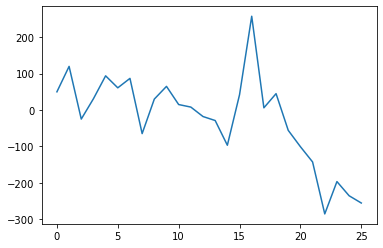

In [26]:
plt.plot(df2["Value"])

In [27]:
X=df2["Value"].values
result = adfuller(X)
print(f"ADF Statistics is {result[0]:.4f}")
print(f"p values is {result[1]}")
print("Critical Values are:")
for key,value in result[4].items():
    print(f"{key}:  {value:.4f}")
if result[0] < result[4]["5%"]:
    print("Reject the null hypothesis, time series is stationary")
else:
    print("Failed to reject the null hypothesis, time series is non-stationary")

ADF Statistics is -1.7434
p values is 0.40889412299525735
Critical Values are:
1%:  -3.7239
5%:  -2.9865
10%:  -2.6328
Failed to reject the null hypothesis, time series is non-stationary


In [28]:
df2["Difference"] = df2["Value"].diff()

In [29]:
df2.head()

,Time,Value,Difference
0,1,50,NaN
1,2,120,70.0
2,3,-25,-145.0
3,4,31,56.0
4,5,94,63.0


In [30]:
df2.tail()

,Time,Value,Difference
21,22,-143,-42.0
22,23,-286,-143.0
23,24,-197,89.0
24,25,-236,-39.0
25,26,-256,-20.0


In [31]:
diff_values=df2["Difference"].values
diff_values

array([  nan,   70., -145.,   56.,   63.,  -33.,   26., -152.,   95.,
         35.,  -50.,   -7.,  -26.,  -11.,  -68.,  139.,  216., -252.,
         39., -101.,  -45.,  -42., -143.,   89.,  -39.,  -20.])

In [32]:
y=diff_values[~np.isnan(df2["Difference"])]
y

array([  70., -145.,   56.,   63.,  -33.,   26., -152.,   95.,   35.,
        -50.,   -7.,  -26.,  -11.,  -68.,  139.,  216., -252.,   39.,
       -101.,  -45.,  -42., -143.,   89.,  -39.,  -20.])

In [33]:
y.shape

(25,)

In [34]:
original_values=df2["Value"].values
original_values

array([  50,  120,  -25,   31,   94,   61,   87,  -65,   30,   65,   15,
          8,  -18,  -29,  -97,   42,  258,    6,   45,  -56, -101, -143,
       -286, -197, -236, -256], dtype=int64)

In [35]:
X=original_values[:-1]
X

array([  50,  120,  -25,   31,   94,   61,   87,  -65,   30,   65,   15,
          8,  -18,  -29,  -97,   42,  258,    6,   45,  -56, -101, -143,
       -286, -197, -236], dtype=int64)

In [36]:
X.shape

(25,)

In [37]:
X=sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     3.039
Date:                Mon, 30 May 2022   Prob (F-statistic):             0.0946
Time:                        20:28:42   Log-Likelihood:                -148.93
No. Observations:                  25   AIC:                             301.9
Df Residuals:                      23   BIC:                             304.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.2489     19.640     -0.827      0.4

In [38]:
results.tvalues[1]

-1.7434145361492948